In [1]:
# import libraries.
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#  let us consider y as response
# converting the response to numeric values and saving as a new column
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

In [5]:
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [7]:
# creating job_dummies because it is categorical
job_dummies = pd.get_dummies(bank.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [8]:
# only 3 people in the dataset have a status of yes
# so, let us treat this as a 2-class feature rather than a 3-class feature
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})

In [9]:
## 4. contact
# convert the feature to numeric values
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})

In [10]:
# create poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [11]:
# concatenate bank DataFrame with job_dummies and poutcome_dummies
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

In [12]:
## create X dataframe having 'default', 'contact', 'previous', 'euribor3m' and including 13 dummy #columns 
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
x = bank[feature_cols]
# create y
y = bank.outcome

In [13]:
print(x)

       default  contact  previous  euribor3m  job_blue-collar  \
0            0        1         0      4.857                0   
1            1        1         0      4.857                0   
2            0        1         0      4.857                0   
3            0        1         0      4.857                0   
4            0        1         0      4.857                0   
5            1        1         0      4.857                0   
6            0        1         0      4.857                0   
7            1        1         0      4.857                1   
8            0        1         0      4.857                0   
9            0        1         0      4.857                0   
10           1        1         0      4.857                1   
11           0        1         0      4.857                0   
12           0        1         0      4.857                1   
13           0        1         0      4.857                0   
14           0        1  

In [14]:
print(y)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: outcome, Length: 41188, dtype: int64


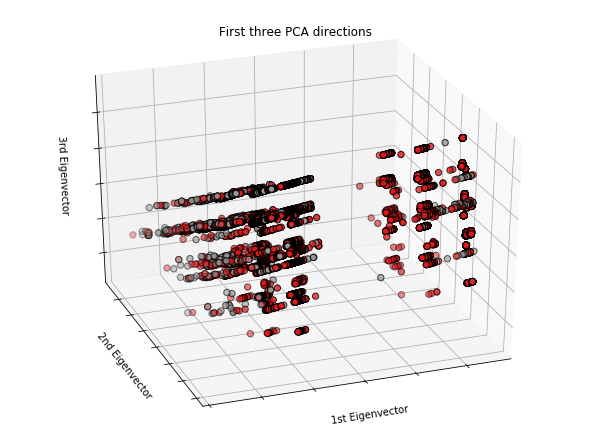

In [15]:
# ploting the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_reduced = PCA(n_components=3).fit_transform(bank[feature_cols])
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()